In [24]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [25]:
#Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])


In [26]:
df_DA_US['salary_year_avg'].sample(10)

173182     65000.0
755693    106492.5
534201     55080.0
212811     97500.0
222923     50000.0
14125     110000.0
549892     55000.0
728111    122500.0
109679    103000.0
738652     74050.0
Name: salary_year_avg, dtype: float64

<Axes: >

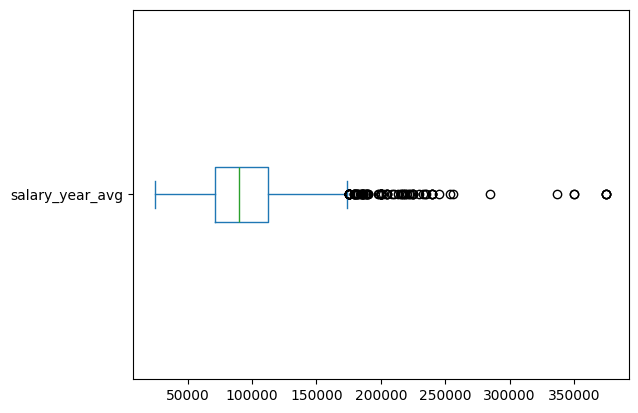

In [27]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

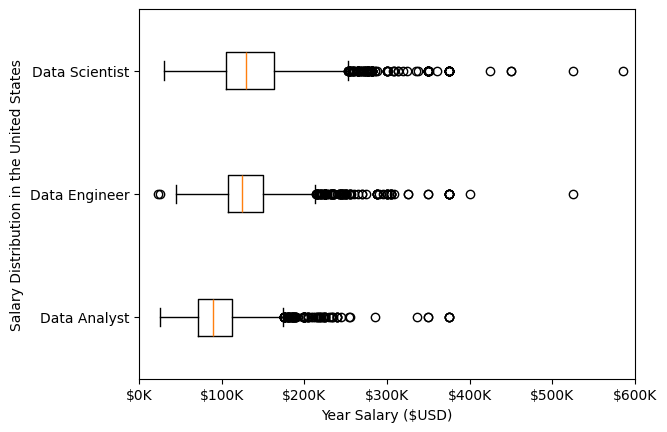

In [32]:


job_titles =['Data Analyst','Data Engineer','Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, tick_labels=job_titles, vert=False)

plt.xlabel('Year Salary ($USD)')

plt.ylabel('Salary Distribution in the United States')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()